In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<p style= 'font-size: 20px'> No missing columns</p>

In [6]:
df.duplicated().sum()

0

<p style= 'font-size: 20px'> No duplicate columns</p>

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<p style= 'font-size: 20px'> This is an imbalanced classification problem</p>

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<p style= 'font-size: 20px'> Dataset is focusing only France, Germany and Spain</p>

In [9]:
# Remove RowNumber, CustomerId and Surname columns
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#OneHotEncoding Geography and Gender columns
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 7)                 84        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
#Model compilation
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [49]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5360 - accuracy: 0.7619 - val_loss: 0.4760 - val_accuracy: 0.8019
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.8033 - val_loss: 0.4533 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8114 - val_loss: 0.4398 - val_accuracy: 0.8075
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8139 - val_loss: 0.4328 - val_accuracy: 0.8150
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8177 - val_loss: 0.4274 - val_accuracy: 0.8144
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8195 - val_loss: 0.4234 - val_accuracy: 0.8138
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8195 - val_loss: 0.4205 - val_accuracy: 0.8144

In [40]:
model.layers[0].get_weights()

[array([[ 3.43860120e-01, -6.64363876e-02,  5.15858591e-01,
         -6.94027320e-02, -3.75179738e-01, -1.33004650e-01,
          3.73565733e-01,  2.75799394e-01, -7.03518242e-02,
          3.14552374e-02, -2.18553096e-01],
        [ 4.08050090e-01, -4.77276295e-01,  6.00099444e-01,
          1.39677930e+00, -1.65433735e-01,  9.04577971e-01,
          1.31158710e+00,  2.51333207e-01,  2.61787027e-01,
          1.65342614e-01,  4.97829556e-01],
        [-2.86405664e-02, -1.95774168e-01,  1.78316489e-01,
         -9.12404209e-02,  4.27369773e-01,  2.67431974e-01,
         -1.41874072e-03, -4.17956486e-02, -1.39856394e-02,
         -7.27846250e-02,  8.02535415e-02],
        [-1.73883528e-01,  1.06095344e-01, -1.60639003e-01,
         -3.89879644e-01, -9.37033296e-02, -5.62119670e-02,
          2.53783911e-02, -2.83253342e-01,  3.03710550e-01,
         -5.16821705e-02, -3.09502989e-01],
        [ 5.14895320e-01,  2.90019482e-01,  7.51027048e-01,
         -3.03692907e-01,  7.96098262e-04,  

In [41]:
model.layers[1].get_weights()

[array([[ 0.5170153 , -0.42739865,  0.21651681,  0.55490273,  0.82360363,
          0.33386964,  0.5084514 ],
        [ 0.1641543 ,  0.37849015,  0.64168036,  0.28001007, -0.2810855 ,
         -1.0203075 , -0.25219908],
        [ 0.5183799 , -0.27479497,  0.09559929, -0.3733159 ,  0.2274656 ,
         -0.20229258,  0.06052284],
        [ 0.35251892,  0.508881  , -0.35526374, -0.5230916 ,  0.41578835,
          0.01621727, -0.61369824],
        [-0.20122227,  0.27970266, -0.02641051,  0.26430508, -0.30532256,
          0.44795784,  0.3286033 ],
        [-0.7212486 ,  0.67022276, -0.3345815 , -0.24953479,  0.33834448,
         -1.0885631 ,  0.16204247],
        [-0.14823411,  0.81919414, -0.3182863 , -0.45146218, -0.30125082,
          0.4464191 , -0.8577473 ],
        [ 0.12777635, -0.25126874,  0.46039736,  0.2806294 ,  0.10861602,
          0.06951281,  0.48418656],
        [ 1.6299546 , -0.22353046, -1.0042763 , -0.33405015, -0.64089876,
          0.528192  , -0.43524665],
        [ 

In [42]:
model.layers[2].get_weights()

[array([[ 0.840469  ],
        [-0.69385135],
        [-0.4475711 ],
        [-1.2958785 ],
        [-1.0324765 ],
        [ 0.77742463],
        [-0.56172895]], dtype=float32),
 array([0.16067769], dtype=float32)]

In [55]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [56]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8605

In [58]:
import matplotlib.pyplot as plt

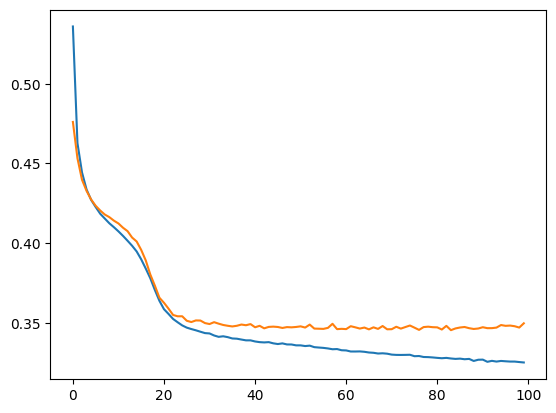

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

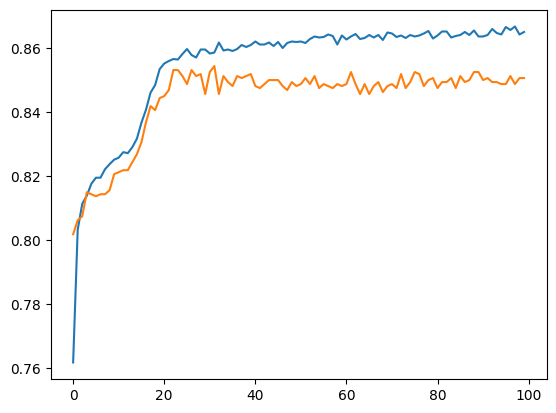

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])